- [https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/](https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/)

In [1]:
!head -10 airline-passengers.csv

"Month","Passengers"
"1949-01",112
"1949-02",118
"1949-03",132
"1949-04",129
"1949-05",121
"1949-06",135
"1949-07",148
"1949-08",148
"1949-09",136


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
# load the dataset
df = pd.read_csv('airline-passengers.csv', usecols=[1], engine='python')

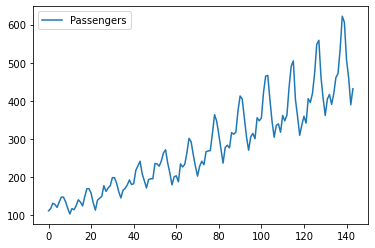

In [4]:
df.plot();

In [5]:
dataset = df.values

In [6]:
dataset.dtype

dtype('int64')

In [7]:
dataset = dataset.astype('float32')

In [8]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_scaled = scaler.fit_transform(dataset)

In [9]:
# split into train and test sets
train_size = int(len(dataset_scaled) * 0.67)
test_size = len(dataset_scaled) - train_size
train, test = dataset_scaled[0:train_size,:], dataset_scaled[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [10]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [11]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [12]:
trainX[:5], trainY[:5]

(array([[0.01544401, 0.02702703, 0.05405405],
        [0.02702703, 0.05405405, 0.04826255],
        [0.05405405, 0.04826255, 0.03281853],
        [0.04826255, 0.03281853, 0.05984557],
        [0.03281853, 0.05984557, 0.08494207]], dtype=float32),
 array([0.04826255, 0.03281853, 0.05984557, 0.08494207, 0.08494207],
       dtype=float32))

In [13]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [14]:
trainX[:5], trainY[:5]

(array([[0.01544401],
        [0.02702703],
        [0.05405405],
        [0.04826255],
        [0.03281853]], dtype=float32),
 array([0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984557],
       dtype=float32))

LSTM expected input shape:<br>
**`(n_instances, n_timesteps, n_features)`**

In [15]:
for s in dir(np):
    if "dim" in s:
        print(s)

expand_dims
ndim


Instead of using `reshape()` like in the [tutorial](https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/), we could also opt `expand_dims()`.
```python
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
```

In [16]:
trainX.shape

(94, 1)

In [17]:
X_train = np.expand_dims(trainX, axis=1)
X_train.shape

(94, 1, 1)

In [18]:
y_train = trainY

In [24]:
X_test = np.expand_dims(testX, axis=1)
y_test = testY

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [20]:
# our first LSTM model
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 4)                 96        
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss="mean_squared_error", optimizer="adam")
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 18s - loss: 0.0413
Epoch 2/100
94/94 - 1s - loss: 0.0201
Epoch 3/100
94/94 - 1s - loss: 0.0161
Epoch 4/100
94/94 - 1s - loss: 0.0146
Epoch 5/100
94/94 - 1s - loss: 0.0135
Epoch 6/100
94/94 - 1s - loss: 0.0126
Epoch 7/100
94/94 - 1s - loss: 0.0117
Epoch 8/100
94/94 - 1s - loss: 0.0106
Epoch 9/100
94/94 - 1s - loss: 0.0094
Epoch 10/100
94/94 - 1s - loss: 0.0084
Epoch 11/100
94/94 - 1s - loss: 0.0075
Epoch 12/100
94/94 - 1s - loss: 0.0066
Epoch 13/100
94/94 - 1s - loss: 0.0058
Epoch 14/100
94/94 - 1s - loss: 0.0050
Epoch 15/100
94/94 - 1s - loss: 0.0043
Epoch 16/100
94/94 - 1s - loss: 0.0038
Epoch 17/100
94/94 - 1s - loss: 0.0033
Epoch 18/100
94/94 - 1s - loss: 0.0030
Epoch 19/100
94/94 - 1s - loss: 0.0027
Epoch 20/100
94/94 - 1s - loss: 0.0025
Epoch 21/100
94/94 - 1s - loss: 0.0024
Epoch 22/100
94/94 - 1s - loss: 0.0022
Epoch 23/100
94/94 - 1s - loss: 0.0022
Epoch 24/100
94/94 - 1s - loss: 0.0021
Epoch 25/100
94/94 - 1s - loss: 0.0021
Epoch 26/100
94/94 - 1s - loss: 0

In [25]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

Next, we want to calculate the RMSE, but not that of the scaled dataset, but that of the original dataset, so we have to inverse transform our `pred_train` and `pred_test` back. 

In [26]:
pred_train_unscaled = scaler.inverse_transform(pred_train)
pred_test_unscaled = scaler.inverse_transform(pred_test)
pred_train_unscaled.shape, pred_test_unscaled.shape

((94, 1), (46, 1))

In [28]:
pred_train.shape, pred_test.shape

((94, 1), (46, 1))

In [30]:
y_train.shape, y_test.shape

((94,), (46,))

In [31]:
y_train_unscaled = scaler.inverse_transform(np.expand_dims(y_train, axis=-1))
y_test_unscaled = scaler.inverse_transform(np.expand_dims(y_test, axis=-1))
y_train_unscaled.shape, y_test_unscaled.shape

((94, 1), (46, 1))

In [33]:
from sklearn.metrics import mean_squared_error

In [36]:
rmse_train = np.sqrt(mean_squared_error(pred_train_unscaled,
                                        y_train_unscaled))
rmse_test = np.sqrt(mean_squared_error(pred_test_unscaled,
                                       y_test_unscaled))
rmse_train, rmse_test

(22.873537, 48.034576)

In [38]:
dataset.shape

(144, 1)

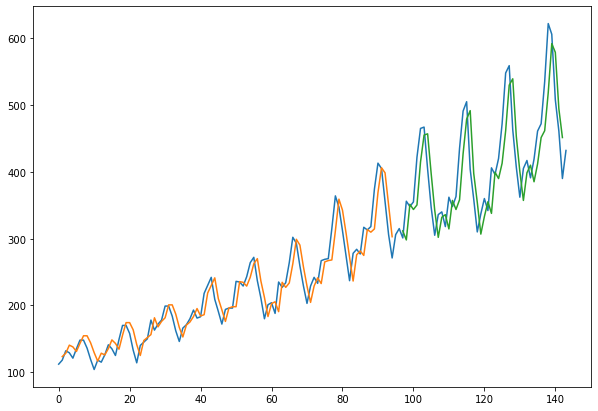

In [47]:
plt.figure(figsize=(10,7))
plt.plot(dataset)
plt.plot(range(1, train_size-1), pred_train_unscaled)
plt.plot(range(train_size+1, len(dataset)-1),
         pred_test_unscaled);